In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 点估计(point estimate)
拿样本去估计总体，并且常常是样本中的一点。

In [2]:
np.random.seed(2016)
salary_1 = stats.poisson.rvs(mu=3500, size=150000)
salary_2 = stats.poisson.rvs(mu=2000, size=100000)
salary_all = np.concatenate((salary_1, salary_2))
salary_all.mean()

2900.0457999999999

In [3]:
# 下面是进行采样
# 下面是直接用一个数值
np.random.seed(2016)
sample_salary = np.random.choice(a=salary_all, size=500)
print(sample_salary.mean())
salary_all.mean() - sample_salary.mean()

2812.608


87.437799999999697

> **`random.sample`** 实际上也是随机取样的方法。

In [6]:
# 下面这个是比例。
random.seed(10)
population_occupation = (['doctor'] * 100000) + \
                        (['teacher'] * 50000) + \
                        (['farmer'] * 50000) +  \
                        (['engineer'] * 25000)+ \
                        (['other']* 25000)
demo_sample = random.sample(population_occupation, 1000)
for occupation in set(demo_sample):
    print(occupation + '在样本中的比例:')
    print(demo_sample.count(occupation) / 1000)      # 这个是统计这个职业在样本中的比例。
    print(occupation + '在总体中的比例:')
    print(population_occupation.count(occupation)/ 250000)    # 这个是统计这个职业在总体中的比例。

doctor在样本中的比例:
0.379
doctor在总体中的比例:
0.4
other在样本中的比例:
0.099
other在总体中的比例:
0.1
teacher在样本中的比例:
0.231
teacher在总体中的比例:
0.2
farmer在样本中的比例:
0.192
farmer在总体中的比例:
0.2
engineer在样本中的比例:
0.099
engineer在总体中的比例:
0.1


## 中心极限定理
sampling distributation符合正态分布（不停采样的话，样本的均值是符合正态分布的。）

-0.40093032100832643


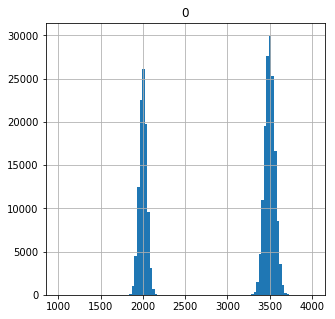

In [7]:
pd.DataFrame(salary_all).hist(bins=100, range=(1000, 4000), figsize=(5,5))
print(stats.skew(salary_all))    # 计算偏移量，负数，表示左偏。

-0.16466522480946638


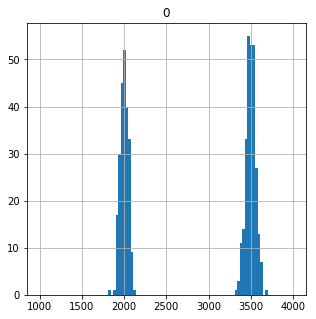

In [8]:
pd.DataFrame(sample_salary).hist(bins=100, range=(1000, 4000), figsize=(5,5))
print(stats.skew(sample_salary))

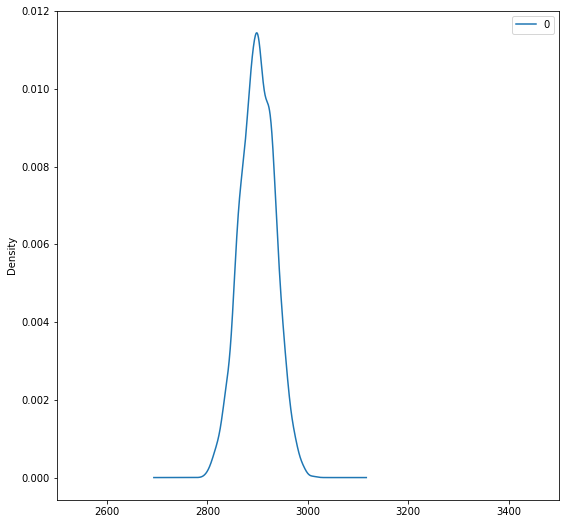

In [9]:
# 进行很多次采样，然后画出概率密度
np.random.seed(2016)

point_estimats = []

for x in range(2000):
    sample = np.random.choice(a = salary_all, size= 500)
    point_estimats.append(sample.mean())
    
pd.DataFrame(point_estimats).plot(kind='density',       # Plot sample meandensity
                                 figsize=(9,9),
                                 xlim=(2500, 3500)
                                 )

In [10]:
salary_all.mean() - np.array(point_estimats).mean()

0.61130800000046293

## 置信区间

[https://en.wikipedia.org/wiki/Confidence_interval](https://en.wikipedia.org/wiki/Confidence_interval)<br/>

置信区间展现的是这个参数的真实值有一定概率落在测量结果的周围的程度<br/>
$$z*\frac{\sigma}{\sqrt n}$$

> ## #下面的这个例子是基于总的标准差已知的情况，和确定整体是整体分布的情况下。

In [12]:
np.random.seed(2016)
sample_size=1000
sample = np.random.choice(a=salary_all, size=sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q=0.975)     # 95%的置信区间，因为是双尾的，所以现在需要使用的是0.975
print('z-critical value:')
print(z_critical)
pop_stdev = salary_all.std()
margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print('置信区间:')
print(confidence_interval)

z-critical value:
1.95996398454
置信区间:
(2833.9102614384133, 2925.2317385615866)


In [14]:
np.random.seed(2016)
sample_size=1000
intervals = []
sample_means = []
for sample in range(25):
    sample = np.random.choice(a=salary_all, size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    z_critical = stats.norm.ppf(q=0.975)
    pop_stdev = salary_all.std()
    stats.norm.ppf(q=0.025)
    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    intervals.append(confidence_interval)

> 像下面这种有上限和下限的图叫做 **`errorbar`** 。 

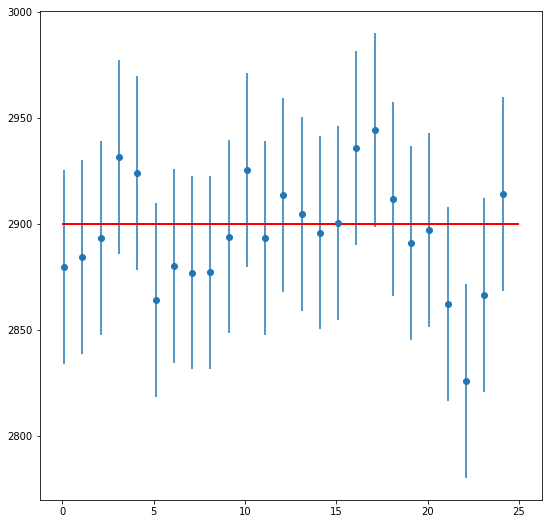

In [15]:
# 下面进行画图
plt.figure(figsize=(9, 9))
plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means,
             yerr=[(top-bot)/2 for top, bot in intervals],
             fmt='o'
            )
plt.hlines(xmin=0, xmax=25, y=salary_all.mean(), linewidth=2.0, color='red')

> ## # 下面这部分是不符合上面的这种情况，而采用t分布来进行的。

In [17]:
np.random.seed(2016)
sample_size=25
sample = np.random.choice(a=salary_all, size=sample_size)
sample_mean = sample.mean()
t_critical = stats.t.ppf(q=0.975, df=24)
print('t_critical value:')
print(t_critical)
sample_stdev = sample.std()
# sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)
# Standrad deviation estimate
margin_of_error = t_critical * sigma
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence interval:")
print(confidence_interval)

t_critical value:
2.06389856163
Confidence interval:
(2339.3178870812958, 2970.5221129187044)


In [18]:
# Check the difference between critical values with a sample size of 1000
stats.t.ppf(q=0.975, df=999) - stats.norm.ppf(q=0.975)

0.0023774765933946007

> 有很简单的方法来计算执行区间： **`stats.t.interval`**

In [19]:
stats.t.interval(
    alpha=0.95,     # Confidence level
    df=24,          # Degrees of freedom
    loc=sample_mean,# Sample mean
    scale=sigma
)

(2339.3178870812958, 2970.5221129187044)

$$z*\sqrt{\frac{p(p-1)}{n}}$$

In [20]:
z_critical = stats.norm.ppf(0.975) # Record z-critical value 
p = 0.192 # Point estimate of proportion 
n = 1000 # Sample size 
margin_of_error = z_critical * math.sqrt((p*(1-p))/n) 
confidence_interval = (p - margin_of_error, # Calculate the the interval 
                       p + margin_of_error) 
confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [21]:
stats.norm.interval(alpha = 0.95, # Confidence level 
                    loc = 0.192, # Point estimate of proportion 
                    scale = math.sqrt((p*(1-p))/n)) # Scaling factor

(0.16758794241348748, 0.21641205758651252)